In [1]:
import sys
sys.path.append('../../utils/')
from jsonio import load
from poly1d import poly1d

import matplotlib.pyplot as plt
import numpy as np

#### read_record
The original record file is too big to upload to github (~90MB)

If you need it, please contact me liumingzhou@stu.pku.edu.cn, I will send it by email

In [2]:
def randpick(llist,seeds=[0,2,4,6,8]):
    # pick 5 seeds. you can also plot over 10 seeds, the results are similar.
    # here, we use 5 seeds to unify with other experiments
    return [llist[ind] for ind in seeds]

In [3]:
file = './record.json'
record = load(file)

In [4]:
for key in record.keys():
    record[key]['hstar'] = randpick(record[key]['hstar'])
    record[key]['mse'] = randpick(record[key]['mse'])

#### sort subsets by their estimated worst-case risk

In [5]:
log = list()
for subset in record.keys():
    mean_hstar = np.array(record[subset]['hstar'])[:,-1].mean()
    # use .std(1).mean() for mean_stdmse
    mean_maxmse = np.array(record[subset]['mse']).max(1).mean()
    log.append((subset,mean_hstar,mean_maxmse))

In [6]:
log.sort(key=lambda tup:tup[1])

#### fit a line

In [7]:
length = 100
xdata = range(length)
ydata = [l[2] for l in log[:length]]
optsubset = log[0][0]
yfit,ylower,yupper = poly1d(xdata,ydata,alpha=0.05)

#### plot the result

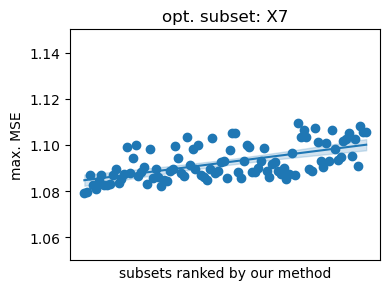

In [8]:
plt.figure(figsize=(4,3))
color = 'tab:blue'

plt.scatter(xdata,ydata,color=color)
plt.plot(xdata,yfit,color=color)
plt.fill_between(xdata,ylower,yupper,alpha=.2,color=color)
plt.title('opt. subset: {}'.format(optsubset))

plt.ylim(1.05, 1.15)
plt.xticks([])
plt.ylabel('max. MSE',)
plt.xlabel('subsets ranked by our method')